In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as pf
import warnings
from astropy.table import Table, vstack
from scipy.ndimage.filters import median_filter as median_filter
import desispec.io
import desispec.coaddition
warnings.filterwarnings('ignore')

In [2]:
def extracting_spectrum(targetid, tileid, paddleid,subset):
    directory = '/global/cfs/cdirs/desi/spectro/redux/cascades/tiles/'+str(tileid)+'/'+str(subset)+'/'
    filename = 'coadd-'+str(paddleid)+'-'+str(tileid)+'-'+str(subset)+'.fits'
    coadd = desispec.io.read_spectra(directory+filename)
    combine = desispec.coaddition.coadd_cameras(coadd)
    index = []
    for i in range(0,len(targetid)):
        index.append(np.where(np.array(coadd.fibermap['TARGETID'])==targetid[i])[0][0])
    print(index)
    return combine.wave,combine.flux['brz'][np.array(index)],combine.ivar['brz'][np.array(index)]

In [3]:
dz_not_good_catalog = pd.read_csv('BGS_dz_not_good_catalog.csv')

In [4]:
dz_not_good_catalog

Unnamed: 0           TARGETID    Z_deep subset_deep  TILEID_deep  \
0           1703  39627222650196713  0.306351     b'deep'        80674   
1           1704  39627222650196713  0.306351     b'deep'        80674   
2           1705  39627222650196713  0.306351     b'deep'        80674   
3           1706  39627222650196713  0.306351     b'deep'        80674   
4           1711  39627222650196713  0.306351     b'deep'        80674   
...          ...                ...       ...         ...          ...   
2212      510478  39633567696815353  0.245931     b'deep'        80694   
2213      510480  39633567696815353  0.245931     b'deep'        80694   
2214      510483  39633567696815353  0.245931     b'deep'        80694   
2215      510532  39633567701008631  0.243449     b'deep'        80694   
2216      510537  39633567701008631  0.243449     b'deep'        80694   

      DELTACHI2_deep  EFFTIME_BRIGHT_deep  FIBERFLUX_R     FLUX_R  \
0        1779.480305          2775.008194     8.058004  24.772594   
1        1779.480305          2775.008194     8.058004  24.772594   
2        1779.480305          2775.008194     8.058004  24.772594   
3        1779.480305          2775.008194     8.058004  24.772594   
4        1779.480305          2775.008194     8.058004  24.772594   
...              ...                  ...          ...        ...   
2212     1413.332849          3862.463150     8.841469  34.034264   
2213     1413.332849          3862.463150     8.841469  34.034264   
2214     1413.332849          3862.463150     8.841469  34.034264   
2215     2691.752282          3862.463150     2.943855  12.171077   
2216     2691.752282          3862.463150     2.943855  12.171077   

      FIBERFLUX_Z  ...  ZWARN_short            RZR_short        dz  zfibermag  \
0       16.948225  ...            0                 b'N'  0.065181  19.393660   
1       16.948225  ...            0                 b'N'  0.517209  19.393660   
2       16.948225  ...            0                 b'N'  0.065430  19.393660   
3       16.948225  ...            0                 b'N'  0.065455  19.393660   
4       16.948225  ...            0  b'single_exposures'  0.060733  19.393660   
...           ...  ...          ...                  ...       ...        ...   
2212    23.142029  ...            0  b'single_exposures'  1.131424  18.876050   
2213    23.142029  ...            0  b'single_exposures'  1.131494  18.876050   
2214    23.142029  ...            0  b'single_exposures'  1.107131  18.876050   
2215     8.332371  ...            0  b'single_exposures'  0.760619  19.915648   
2216     8.332371  ...            0  b'single_exposures'  0.736330  19.915648   

      rfibermag       rmag       zmag       gmag      w1mag     color  
0     20.174490  18.955130  18.174300  20.502573  17.918371 -0.401004  
1     20.174490  18.955130  18.174300  20.502573  17.918371 -0.401004  
2     20.174490  18.955130  18.174300  20.502573  17.918371 -0.401004  
3     20.174490  18.955130  18.174300  20.502573  17.918371 -0.401004  
4     20.174490  18.955130  18.174300  20.502573  17.918371 -0.401004  
...         ...        ...        ...        ...        ...       ...  
2212  19.752989  18.289507  17.412570  19.673004  16.902490  0.049884  
2213  19.752989  18.289507  17.412570  19.673004  16.902490  0.049884  
2214  19.752989  18.289507  17.412570  19.673004  16.902490  0.049884  
2215  20.822786  19.281755  18.374617  20.536592  17.683784  0.385028  
2216  20.822786  19.281755  18.374617  20.536592  17.683784  0.385028  

[2217 rows x 32 columns]

In [5]:
new_cut_catalog = dz_not_good_catalog[(dz_not_good_catalog['RZR_short']=="b'N'")]

In [6]:
tileid_set = list(set(new_cut_catalog['TILEID_deep']))

In [7]:
all_tileid = np.array(new_cut_catalog['TILEID_deep'])

In [8]:
number_tileid = {}
for i in tileid_set:
    search = np.where(all_tileid==i)
    number_tileid[i]=len(search[0])

In [9]:
number_tileid

{80641: 77,
 80642: 98,
 80643: 77,
 80644: 29,
 80645: 39,
 80646: 15,
 80650: 51,
 80651: 14,
 80653: 17,
 80654: 295,
 80655: 44,
 80656: 9,
 80660: 229,
 80664: 182,
 80669: 1,
 80670: 19,
 80674: 16,
 80676: 5,
 80678: 14,
 80680: 8,
 80682: 2,
 80684: 3,
 80685: 1,
 80686: 1,
 80688: 1,
 80690: 11,
 80694: 13,
 80700: 14,
 80605: 8,
 80607: 1,
 80612: 32,
 80613: 16,
 80616: 3,
 80617: 41,
 80618: 28,
 80619: 12,
 80620: 2,
 80629: 6,
 80633: 16}

In [17]:
flux_matrix = np.zeros((100,7781,2))
for i in range(0,100):
    td = [np.array(new_cut_catalog['TARGETID'])[i]]
    tileid = np.array(new_cut_catalog['TILEID_deep'])[i]
    paddeid = np.array(new_cut_catalog['FIBER'])[i] // 500
    subset_deep = str(np.array(new_cut_catalog['subset_deep'])[i])[2:-1]
    subset_short = str(np.array(new_cut_catalog['subset_short'])[i])[2:-1]

    output_deep = extracting_spectrum(td,tileid,paddeid, subset_deep)
    output_short = extracting_spectrum(td,tileid,paddeid, subset_short)
    flux_matrix[i,:,0]=output_deep[1][0]
    flux_matrix[i,:,1]=output_short[1][0]
    print(i)
print('Done')
hdu_spectra = pf.PrimaryHDU(flux_matrix)
hdu_wave = pf.ImageHDU(output_short[0]['brz'])
hdulist = pf.HDUList([hdu_spectra,hdu_wave])
hdulist.writeto('Problematic_spectra_BGS.fits',clobber=True)

INFO:spectra.py:253:read_spectra: iotime 0.757 sec to read coadd-1-80674-deep.fits at 2021-03-30T22:25:33.965046
[202]
INFO:spectra.py:253:read_spectra: iotime 0.663 sec to read coadd-1-80674-20210109.fits at 2021-03-30T22:25:41.845285
[202]
0
INFO:spectra.py:253:read_spectra: iotime 0.452 sec to read coadd-1-80674-deep.fits at 2021-03-30T22:25:49.577340
[202]
INFO:spectra.py:253:read_spectra: iotime 0.685 sec to read coadd-1-80674-20210116.fits at 2021-03-30T22:25:57.373437
[202]
1
INFO:spectra.py:253:read_spectra: iotime 0.465 sec to read coadd-1-80674-deep.fits at 2021-03-30T22:26:04.769891
[202]
INFO:spectra.py:253:read_spectra: iotime 0.670 sec to read coadd-1-80674-20210105.fits at 2021-03-30T22:26:12.463248
[202]
2
INFO:spectra.py:253:read_spectra: iotime 0.474 sec to read coadd-1-80674-deep.fits at 2021-03-30T22:26:19.951556
[202]
INFO:spectra.py:253:read_spectra: iotime 0.767 sec to read coadd-1-80674-20210106.fits at 2021-03-30T22:26:27.773617
[202]
3
INFO:spectra.py:253:read

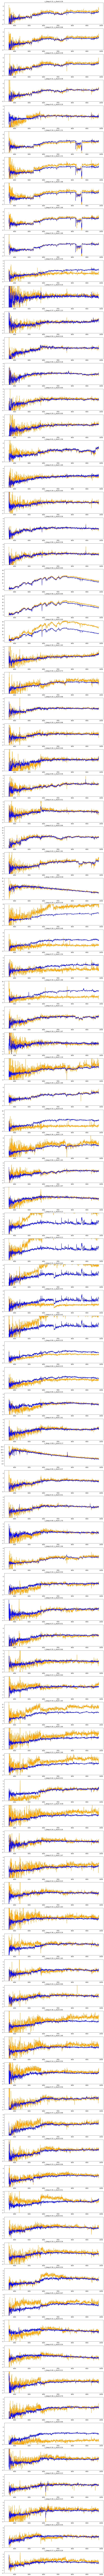

In [18]:
plt.figure(figsize=(15,400))
for index in range(0,100):
    plt.subplot(100,1,index+1)
    plt.plot(output_short[0]['brz'],median_filter(flux_matrix[index,:,1],11),color='orange')
    plt.plot(output_deep[0]['brz'],median_filter(flux_matrix[index,:,0],11),color='b')
    plt.title('z_deep:%0.2f, z_short:%0.2f' % ((np.array(new_cut_catalog['Z_deep'])[index]),np.array(new_cut_catalog['Z_short'])[index]))
    plt.ylim(-2,2*np.median(median_filter(flux_matrix[index,:,0],11))+2)